# Crop Recommendation using Machine Learning

# About the dataset

This dataset was build by augmenting datasets of rainfall, climate and fertilizer data available for India. Gathered over the period by ICFA, India.

THE INFORMATION IN THE DATASET IS PROVIDED TO THE BEST OF KNOWLEDGE OF ICFA. THE BELOW DATA CAN BE USED PUBLICALLY UNDER ALL PUBLIC AND PRIVATE UNDERTAKINGS

**Data fields**
* `N` - ratio of Nitrogen content in soil
* `P` - ratio of Phosphorous content in soil
* `K` - ratio of Potassium content in soil
* `temperature` - temperature in degree Celsius
* `humidity` - relative humidity in %
* `ph` - ph value of the soil
* `rainfall` - rainfall in mm



```
# This is formatted as code
```

# Required Packages

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')



```
# This is formatted as code
```

## Data Fetching

In [81]:
PATH = r'Crop_recommendation.csv'
df = pd.read_csv(PATH)

## Exploratory Data Analysis

It is a preliminary analysis technique used to understand the characteristics of the data and gain insights into it before applying any formal modeling or statistical methods.

In [82]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [83]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [84]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [85]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [86]:
df.size

17600

In [87]:
df.shape

(2200, 8)

In [88]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [89]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [90]:
df['label'].nunique()

22

In [91]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [92]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

### Correlation Map
In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

In [93]:
labels = df['label']
features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

### Histograms for each attribute

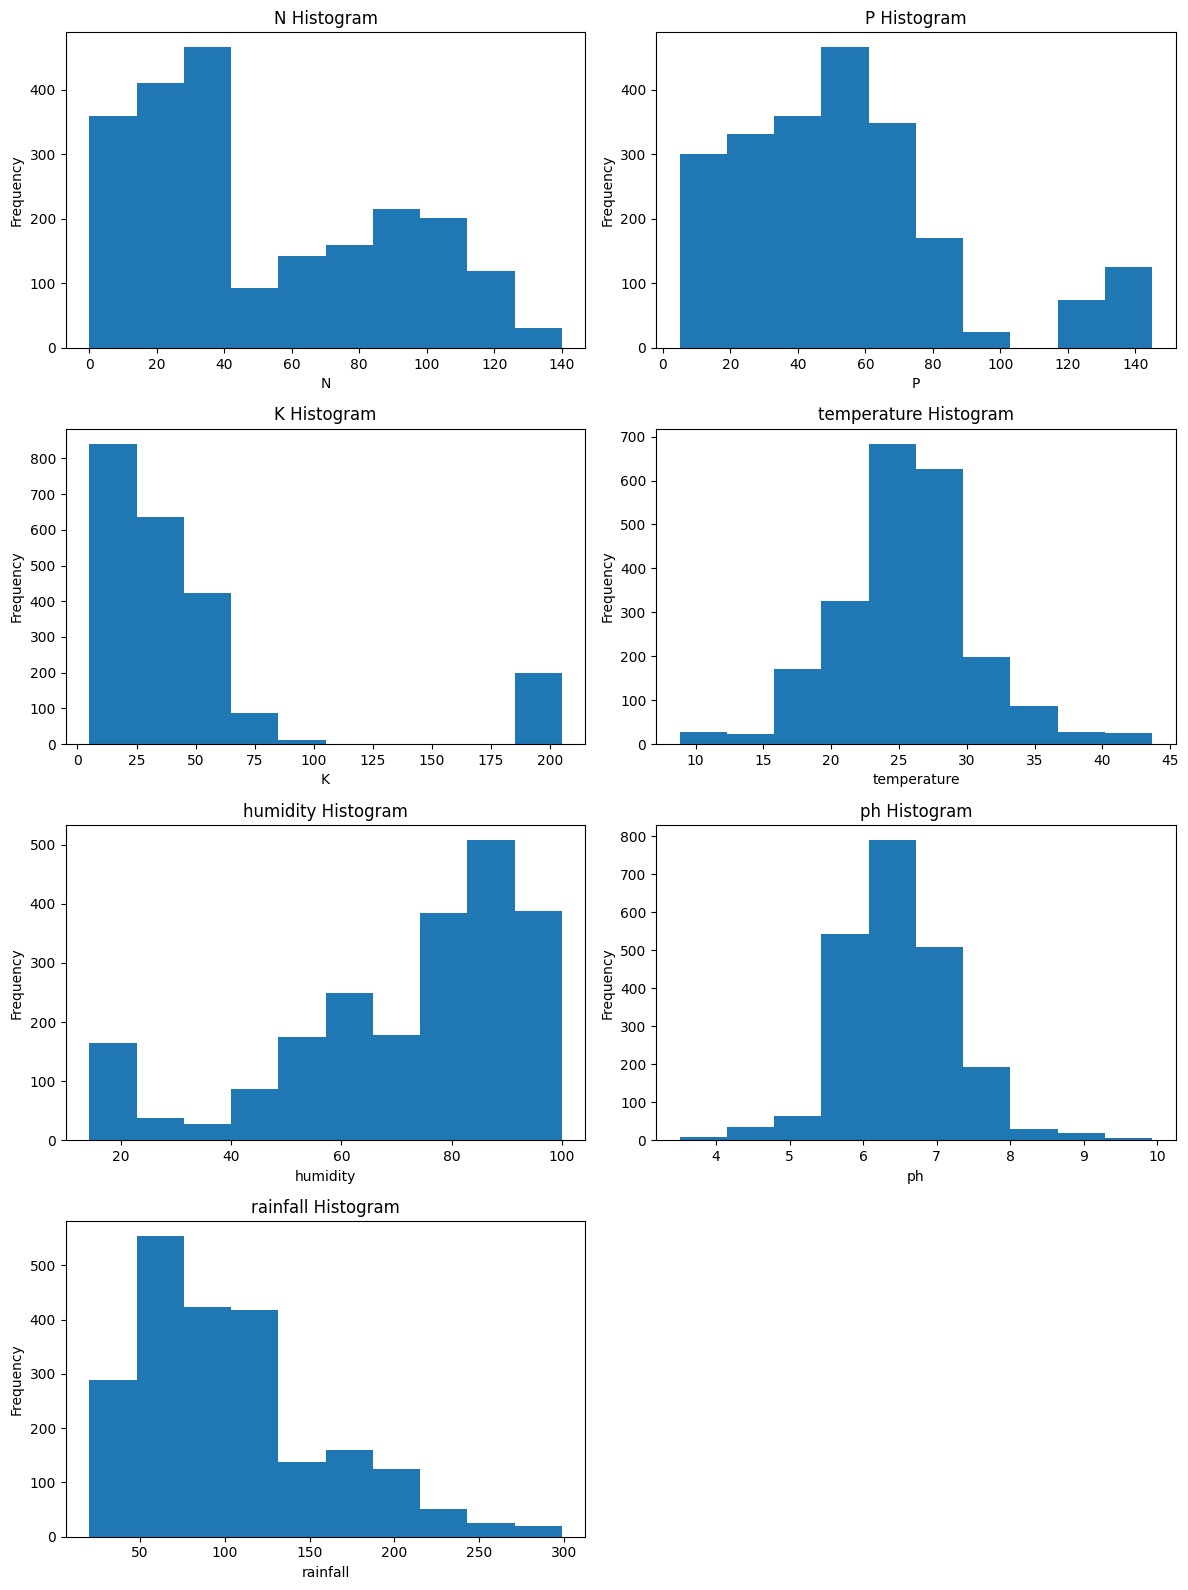

In [94]:
data = df[features]

# Creating a figure with multiple subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Looping over the columns and plotting histograms
for i, column in enumerate(features):
    row = i // 2
    col = i % 2

    axs[row, col].hist(data[column], bins=10)
    axs[row, col].set_title(f'{column} Histogram')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Removing the empty subplot if the number of columns is odd
if len(features) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

In [95]:
df_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


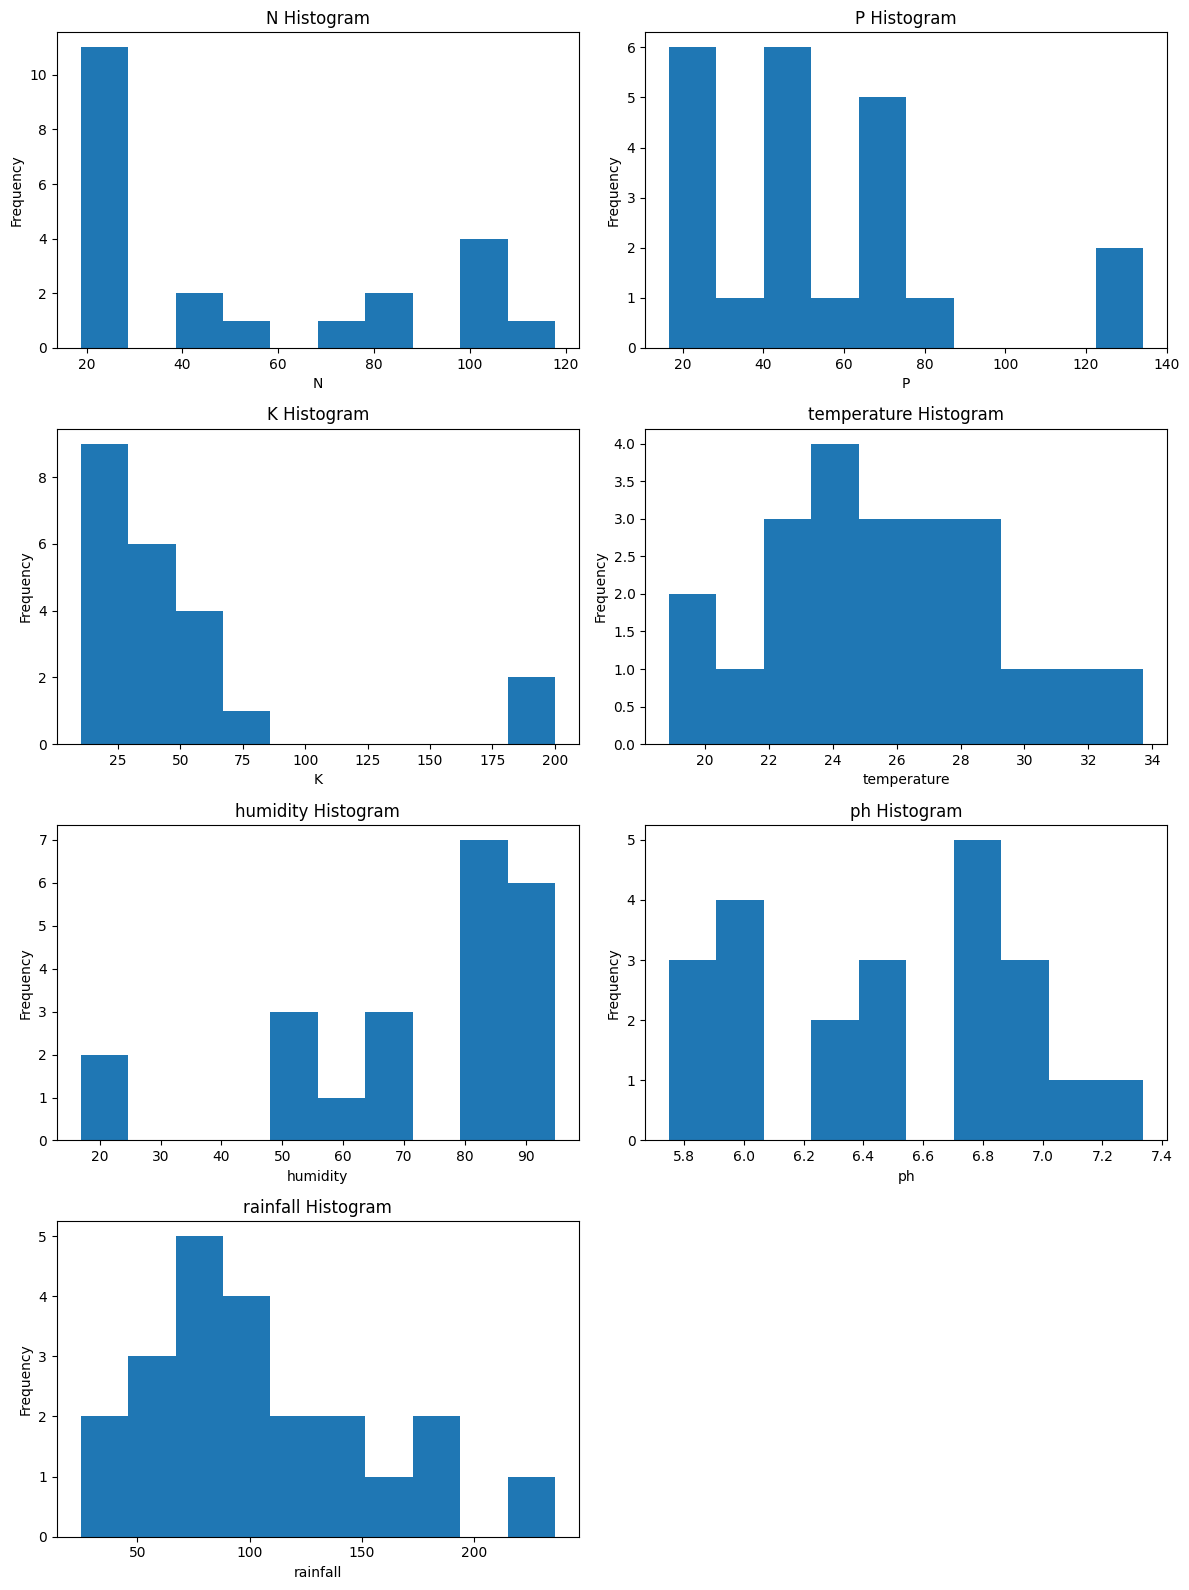

In [96]:
data = df_summary[features]

# Creating a figure with multiple subplots
fig, axs = plt.subplots(4, 2, figsize=(12, 16))

# Looping over the columns and plotting histograms
for i, column in enumerate(features):
    row = i // 2
    col = i % 2

    axs[row, col].hist(data[column], bins=10)
    axs[row, col].set_title(f'{column} Histogram')
    axs[row, col].set_xlabel(column)
    axs[row, col].set_ylabel('Frequency')

# Removing the empty subplot if the number of columns is odd
if len(features) % 2 != 0:
    fig.delaxes(axs[-1, -1])

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

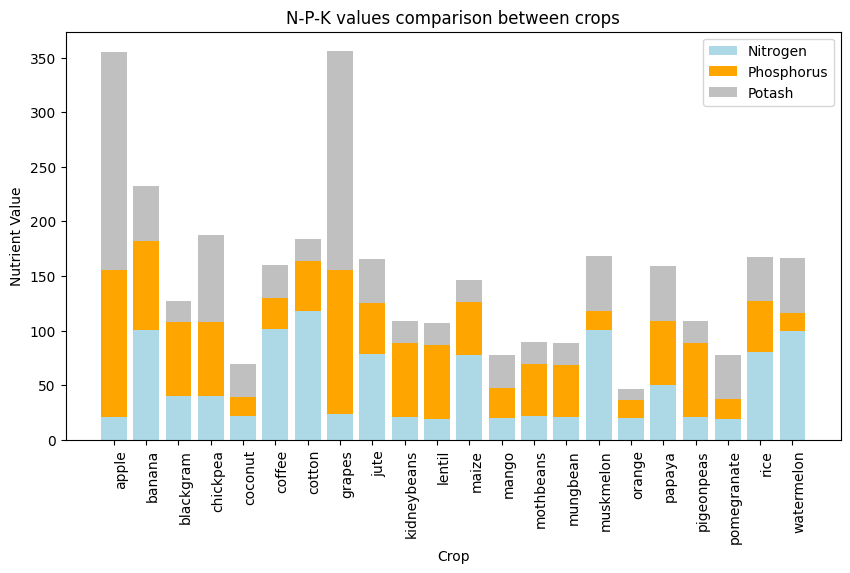

In [97]:
x = df_summary.index
y1 = df_summary['N']
y2 = df_summary['P']
y3 = df_summary['K']

colors = ['lightblue', 'orange', 'silver']


fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=colors[0], label='Nitrogen')
ax.bar(x, y2, color=colors[1], bottom=y1, label='Phosphorus')
ax.bar(x, y3, color=colors[2], bottom=y1 + y2, label='Potash')

ax.set_title("N-P-K values comparison between crops")
ax.set_xlabel("Crop")
ax.set_ylabel("Nutrient Value")
plt.xticks(rotation=90, ha='left', va='top')

ax.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

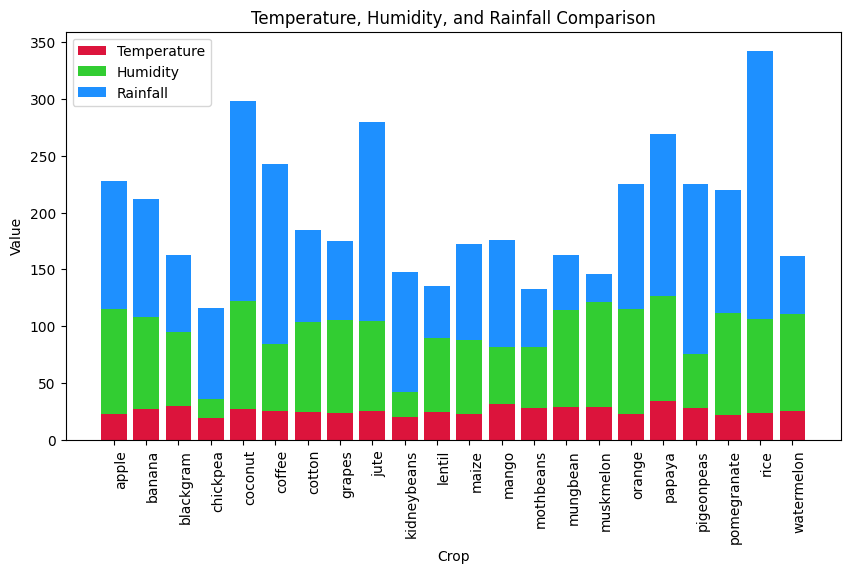

In [98]:
x = df_summary.index
y1 = df_summary['temperature']
y2 = df_summary['humidity']
y3 = df_summary['rainfall']

colors = ['crimson', 'limegreen', 'dodgerblue']

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x, y1, color=colors[0], label='Temperature')
ax.bar(x, y2, color=colors[1], bottom=y1, label='Humidity')
ax.bar(x, y3, color=colors[2], bottom=y1 + y2, label='Rainfall')

ax.set_title("Temperature, Humidity, and Rainfall Comparison")
ax.set_xlabel("Crop")
ax.set_ylabel("Value")
plt.xticks(rotation=90, ha='left', va='top')

ax.legend()
plt.subplots_adjust(bottom=0.2)
plt.show()

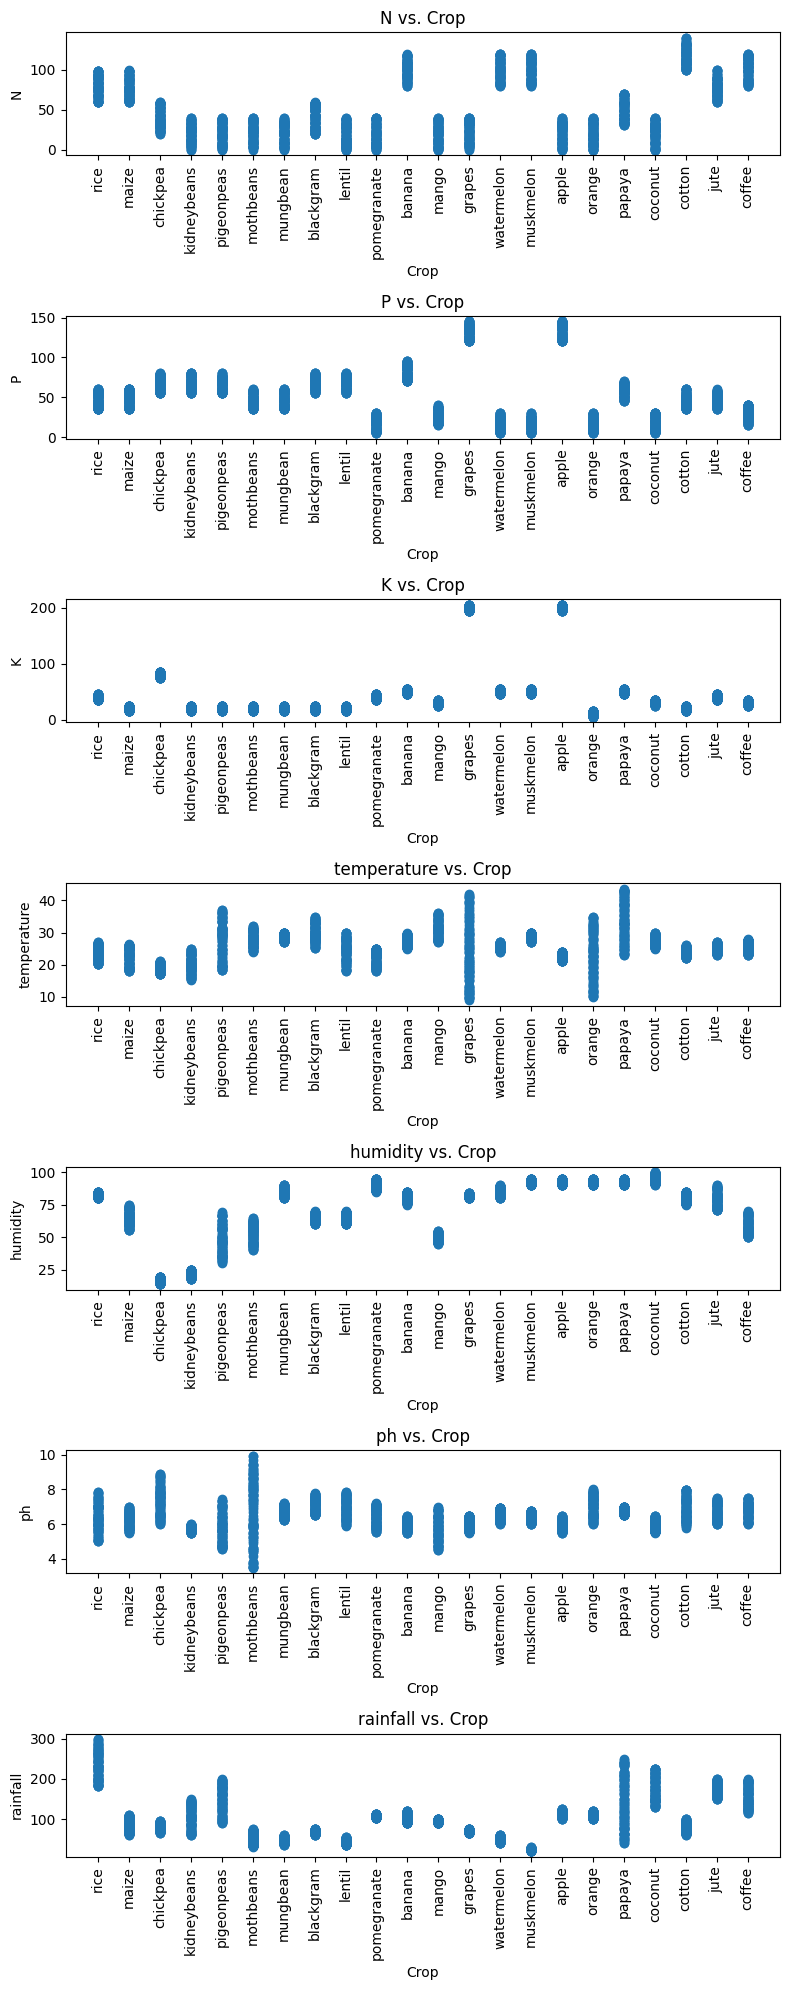

In [99]:
# Creating a figure with multiple subplots
fig, axs = plt.subplots(len(features), 1, figsize=(8, 20))

# Looping over attributes and plotting scatter plots
for i, attribute in enumerate(features):
    axs[i].scatter(labels, df[attribute])
    axs[i].set_title(f'{attribute} vs. Crop')
    axs[i].set_xlabel('Crop')
    axs[i].set_ylabel(attribute)
    axs[i].tick_params(axis='x', rotation=90)

# Adjusting the spacing between subplots
plt.tight_layout()

# Displaying the plot
plt.show()

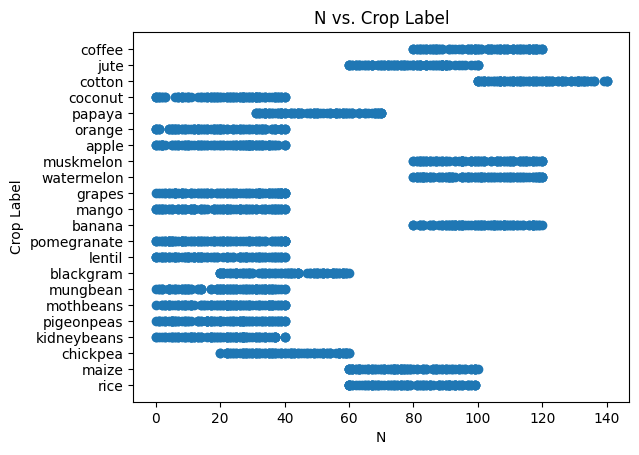

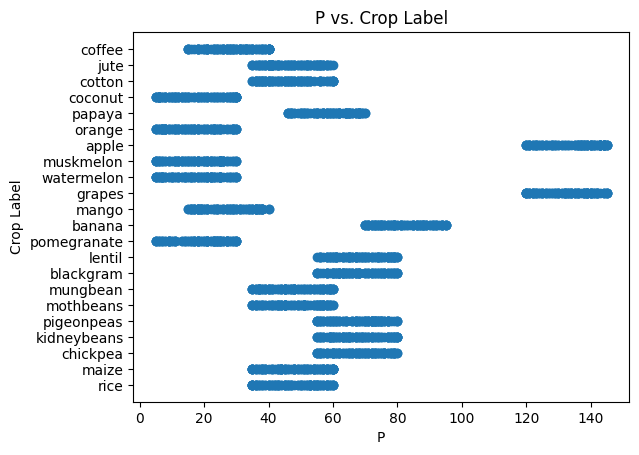

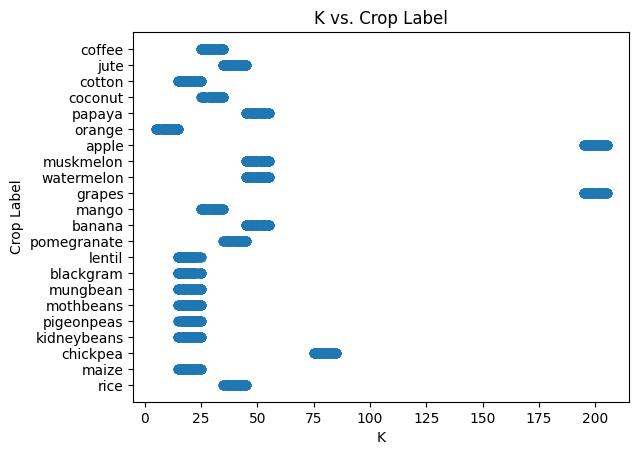

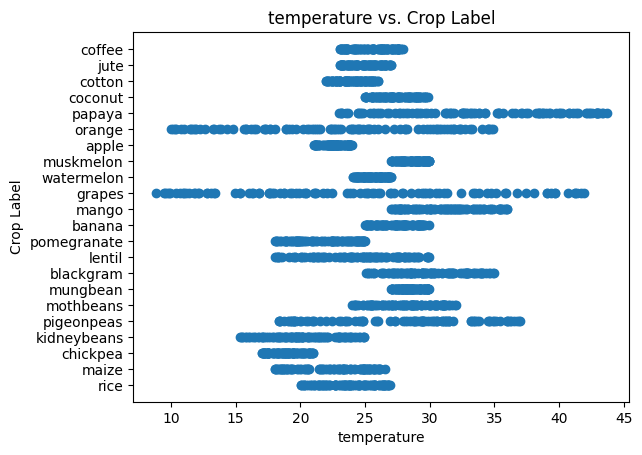

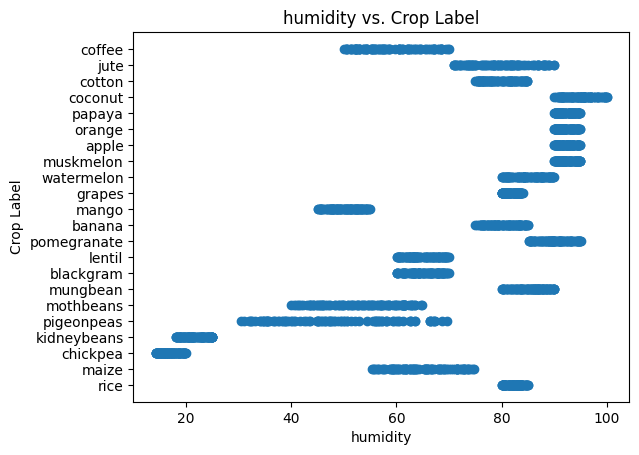

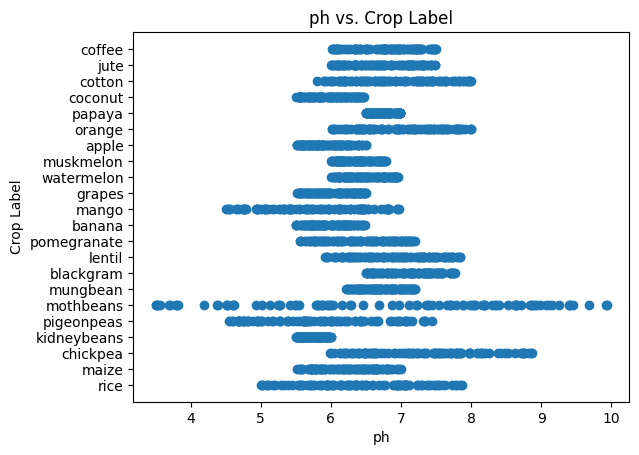

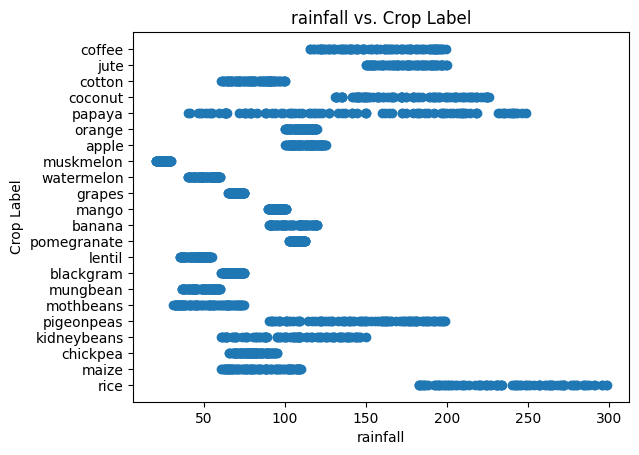

In [100]:
for features in features:
    plt.scatter(df[features], labels)
    plt.title(f'{features} vs. Crop Label')
    plt.xlabel(features)
    plt.ylabel('Crop Label')
    plt.show()

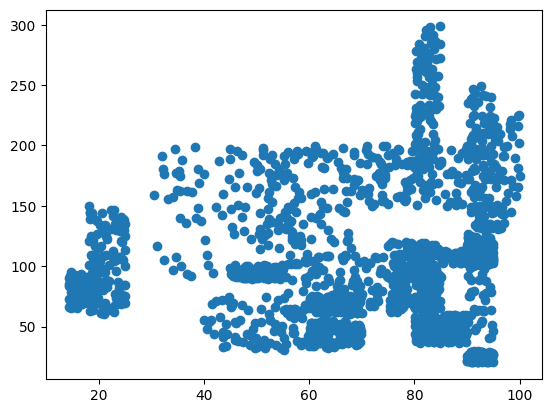

In [101]:
plt.scatter(df['humidity'],df['rainfall'])

# Feature Selections
It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

In [102]:
features = df.iloc[:, :-1]  # Selecting all columns except the last one as features
labels = df.iloc[:, -1]    # Selecting the last column as labels
target = df['label']

# Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [103]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=2)

# Printing the number of samples in each set
print("Number of samples in the training set:", len(X_train))
print("Number of samples in the testing set:", len(X_test))


Number of samples in the training set: 1760
Number of samples in the testing set: 440


## Logistic Regression



Logistic Regression Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        2

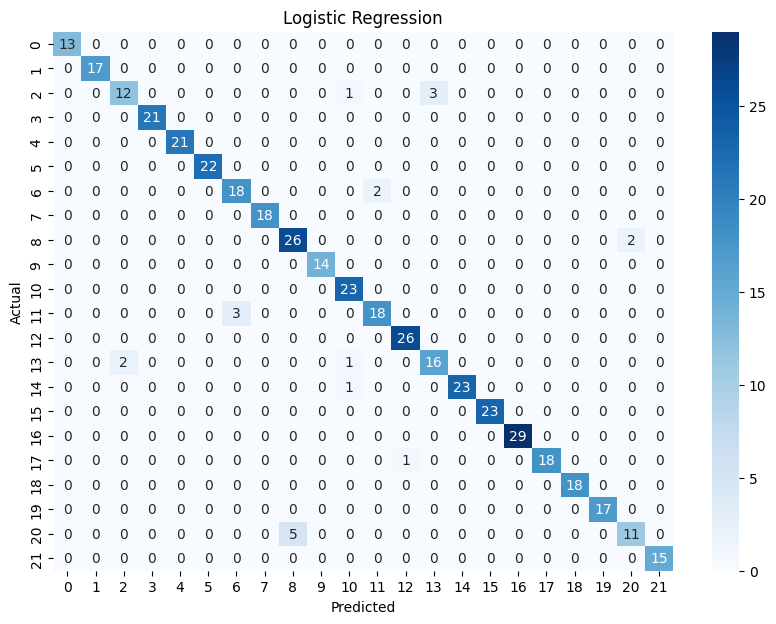

In [108]:
from sklearn.metrics import confusion_matrix
def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
plot_conf_matrix(y_test, y_pred_logreg, 'Logistic Regression')

